# SENTIMENT ANALYSIS ON THE TWEETS FROM TWITTER

In [110]:
# utilities
import re
import string
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk
nltk.download('punkt')
nltk.download('words')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.tokenize import RegexpTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [111]:
#Load the file
df = pd.read_csv("C:/Users/hp/Downloads/CoronaTweetsSentimentAnalysis.csv")
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


# PERFORMING  EXPLORATORY  DATA  ANALYSIS

In [112]:
df.columns


Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [113]:
print('length of data is', len(df))


length of data is 1988


In [114]:
df. shape


(1988, 6)

In [115]:
df.describe()

,UserName,ScreenName
count,1988.000000,1988.000000
mean,994.500000,46817.972837
std,574.030487,1083.483388
min,1.000000,44954.000000
25%,497.750000,45871.500000
50%,994.500000,46822.000000
75%,1491.250000,47729.750000
max,1988.000000,48747.000000


In [116]:
df.nunique()


UserName         1988
ScreenName       1988
Location         1019
TweetAt            14
OriginalTweet    1988
Sentiment           2
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1988 non-null   int64 
 1   ScreenName     1988 non-null   int64 
 2   Location       1536 non-null   object
 3   TweetAt        1988 non-null   object
 4   OriginalTweet  1988 non-null   object
 5   Sentiment      1988 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.3+ KB


In [118]:
df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

# DATA  CLEANING AND  PREPROCESSING

In [119]:
#Data cleaning

#dropping unwanted columns
to_drop = ['TweetAt','UserName','ScreenName','Location']
df.drop(to_drop, inplace=True, axis=1)
print("\nAFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :")
df.head()



AFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :


,OriginalTweet,Sentiment
0,When I couldn't find hand sanitizer at Fred Me...,Positive
1,#Panic buying hits #NewYork City as anxious sh...,Negative
2,Voting in the age of #coronavirus = hand sanit...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive


In [120]:
#missing values percent per column
print("\nMISSING VALUES IN EACH COLUMN :")
print(df.isnull().sum())



MISSING VALUES IN EACH COLUMN :
OriginalTweet    0
Sentiment        0
dtype: int64


In [121]:
#Adding the elements other than alphabets in a list
lis = [" "]
for i in df['OriginalTweet']:
  for j in i:
    if not(j.isalpha()) and not(j in lis):
      lis.append(j)

#Removing the first element which is a single space     
lis = lis[1:]

#Removing the elements in the list for each tweet in the dataframe
for j in range(0,1988):    
  for i in lis:
    df["OriginalTweet"][j] = df["OriginalTweet"][j].replace(i,"")

df.head()

,OriginalTweet,Sentiment
0,When I couldnt find hand sanitizer at Fred Mey...,Positive
1,Panic buying hits NewYork City as anxious shop...,Negative
2,Voting in the age of coronavirus hand sanitiz...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive


In [122]:
#Removing the hyperlinks found in the tweets

for j in range(0,1988):    
  if "httpstco" in df['OriginalTweet'][j]:
    u = df['OriginalTweet'][j].find("httpstco")
    df['OriginalTweet'][j] = df['OriginalTweet'][j][0:u-1]

In [123]:
df

,OriginalTweet,Sentiment
0,When I couldnt find hand sanitizer at Fred Mey...,Positive
1,Panic buying hits NewYork City as anxious shop...,Negative
2,Voting in the age of coronavirus hand sanitiz...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive
...,...,...
1983,Just been through Kpiti New World which is bus...,Positive
1984,Even though the Law Library is closed ALL subs...,Positive
1985,RicePolitics MDCounties Craig will you call on...,Negative
1986,Meanwhile In A Supermarket in Israel People d...,Positive


# DATA  VISUALIZATION

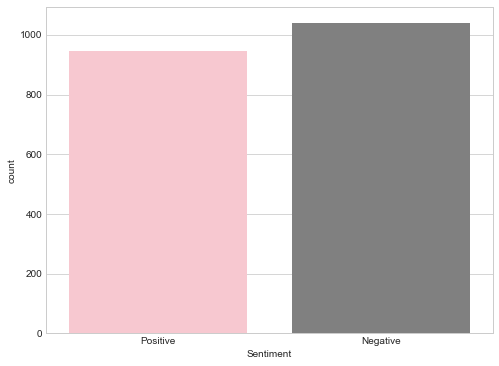

In [124]:
#Data Visualization

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
col = ['pink', 'grey']
ax = sns.countplot(x="Sentiment", data=df , palette = col)


# SPLITTING THE DATASET INTO TRAIN AND TEST

In [125]:
X=df['OriginalTweet']
y=df['Sentiment']

# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)


In [126]:
#Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  43129


In [127]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


# FUNCTION  FOR  MODEL EVALUATION

In [128]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'GnBu',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':10}, labelpad = 8)
    plt.ylabel("Actual values" , fontdict = {'size':10}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':14}, pad = 18)


# MODEL  BUILDING  - MODEL 1 - SVM (Support Vector Machine)


              precision    recall  f1-score   support

    Negative       0.73      0.68      0.70        59
    Positive       0.58      0.63      0.60        41

    accuracy                           0.66       100
   macro avg       0.65      0.66      0.65       100
weighted avg       0.67      0.66      0.66       100



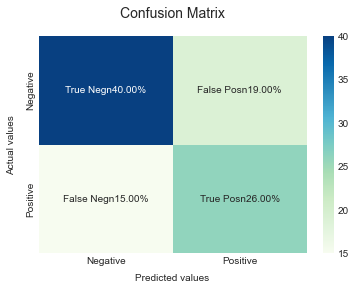

In [129]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

# MODEL  2 -  LogisticRegression

              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69        59
    Positive       0.56      0.59      0.57        41

    accuracy                           0.64       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.64      0.64      0.64       100



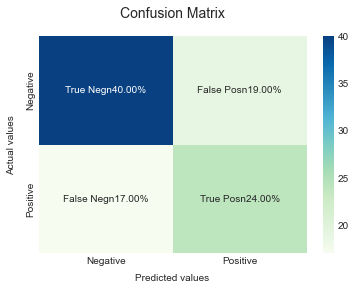

In [106]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

# Summary

From the above fitted models,SVM and Logistic Regression models have given the accuracy of 66% and 64% for the train and test data respectively.Hence,for the corona sentiment analysis of tweets data SVM model is proved to be the best model 